In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

matplotlib.rcParams['font.serif'] = "Charter"
matplotlib.rcParams['font.family'] = "serif"

# Overview

All code based on instructions found in the [video here.](https://www.youtube.com/watch?app=desktop&v=jrWDBkeOVQY&t=516s&pp=2AGEBJACAQ%3D%3D)

# Data Loading
This code goes through each folder in 'Back_EMF_Data_Drill' and extracts all the csvs into a big dictionary 'dataframes'. The name and size of all of these entries are printed, ensure that all data is found before proceeding.

In [2]:
# Directory containing the CSV files
repo_path = 'Tests'

# Dictionary to store DataFrames
dataframes = {}

for foldername in os.listdir(repo_path):
    folder_path = os.path.join(repo_path, foldername)
# Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            # Read the CSV file and skip the header row
            file_path = os.path.join(folder_path, filename)
            df_name = os.path.splitext(filename)[0]
            df = pd.read_csv(file_path, skiprows=1, usecols=[0, 1])
            times = df.iloc[:, 0]
            times = [time_point+abs(times[0]) for time_point in times]
            voltages = df.iloc[:,1]
            # Store the lists in the dictionary
            dataframes[f"{df_name.replace('RTB2004_', '')}_{foldername}"] = {'times': list(times), 'voltages': list(voltages)}

dataframes = dict(sorted(dataframes.items()))

for experiment in dataframes:
    print(f"{experiment} has {len(dataframes[experiment]['times'])} data points")


CHAN1_0250rpm1 has 130895 data points
CHAN1_0250rpm2 has 130895 data points
CHAN1_0250rpm3 has 130895 data points
CHAN1_0500rpm1 has 130439 data points
CHAN1_0500rpm2 has 130439 data points
CHAN1_0500rpm3 has 130439 data points
CHAN1_1000rpm1 has 129311 data points
CHAN1_1000rpm2 has 129311 data points
CHAN1_1000rpm3 has 129311 data points
CHAN2_0250rpm1 has 130895 data points
CHAN2_0250rpm2 has 130895 data points
CHAN2_0250rpm3 has 130895 data points
CHAN2_0500rpm1 has 130439 data points
CHAN2_0500rpm2 has 130439 data points
CHAN2_0500rpm3 has 130439 data points
CHAN2_1000rpm1 has 129311 data points
CHAN2_1000rpm2 has 129311 data points
CHAN2_1000rpm3 has 129311 data points
CHAN3_0250rpm1 has 130895 data points
CHAN3_0250rpm2 has 130895 data points
CHAN3_0250rpm3 has 130895 data points
CHAN3_0500rpm1 has 130439 data points
CHAN3_0500rpm2 has 130439 data points
CHAN3_0500rpm3 has 130439 data points
CHAN3_1000rpm1 has 129311 data points
CHAN3_1000rpm2 has 129311 data points
CHAN3_1000rp

In [17]:
def nice_plot_please(x, y, title, x_label, y_label):
    plt.figure(figsize=(5, 3))
    plt.plot(x, y, label="Voltage", color="black")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show(block=False)

def nice_plot_please_two(x1, y1, x2, y2, title, x_label, y_label,data_name1,data_name2):
    plt.figure(figsize=(5, 3))
    plt.plot(x1, y1,label=data_name1)
    plt.plot(x2, y2,label=data_name2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show(block=False)

def nice_plot_please_three(x1, y1, x2, y2, x3, y3, title, x_label, y_label, data_name1, data_name2, data_name3):
    plt.figure(figsize=(7, 4))
    plt.plot(x1, y1, label=data_name1, color='black', markevery=600, marker='.', markersize=15)
    plt.plot(x2, y2, label=data_name2, color='black', markevery=1200, marker='x', markersize=8)
    plt.plot(x3, y3, label=data_name3,color='black')
    plt.title(title)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.show(block=False)

# Centering Data
Here each experiment is shifted up and down to centre around 0 and a dictionary "centred_data" is generated containing this..

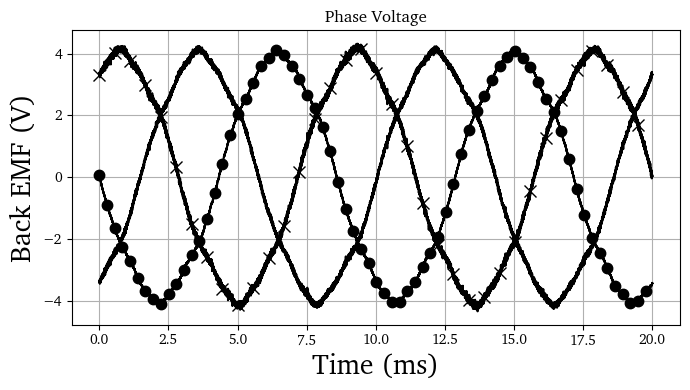

In [21]:
#dictionary of experiments, indexes as [value][0], 0 is time, 1 is voltage
example='CHAN1_1000rpm1'

#centering data about 0
centered_data = {}
for experiment in dataframes:
    mean = np.mean(dataframes[experiment]['voltages'])
    centered_data[experiment]= {'times': dataframes[experiment]['times'], 'voltages' : [v - mean for v in dataframes[experiment]['voltages']]}
    if "CHAN3" in experiment:
        centered_data[experiment]['voltages'] = [v * 10 for v in centered_data[experiment]['voltages']]
#dictionary of experiments, indexes as [value][0], 0 is time, 1 is voltage
#nice_plot_please_two(dataframes[example]['times'],dataframes[example]['voltages'],centered_data[example]['times'],centered_data[example]['voltages'],"Centered Data","Time","Voltage","Original","Centered")
# Filter data to only include the first 0.01 seconds
time_limit = 0.02
filtered_data = {
    key: {
        'times': [t for t in value['times'] if t <= time_limit],
        'voltages': value['voltages'][:len([t for t in value['times'] if t <= time_limit])]
    }
    for key, value in centered_data.items()
}

nice_plot_please_three(
    np.array(filtered_data['CHAN1_1000rpm1']['times']) * 1000, np.array(filtered_data['CHAN1_1000rpm1']['voltages']),
    np.array(filtered_data['CHAN2_1000rpm1']['times']) * 1000, np.array(filtered_data['CHAN2_1000rpm1']['voltages']),
    np.array(filtered_data['CHAN3_1000rpm1']['times']) * 1000, np.array(filtered_data['CHAN3_1000rpm1']['voltages']),
    "Phase Voltage", "Time (ms)", "Back EMF (V)", "Original", "Centered", "Centered"
)


In [5]:
def waveform_data_info(experiment,data=centered_data,window_start=0,window_size=0,voltage_threshold=.5,plot=False,filter=False,dist=1,prom=0.1,distance_factor=2.0):
    test_data = data[experiment]
    if filter == True:
        # Compute the Fourier Transform of the voltages
        N = len(test_data['voltages'])
        T = (test_data['times'][100] - test_data['times'][0]/100)  # Sample spacing
        time_step = T

        yf = fft(test_data['voltages'])
        xf = fftfreq(N, T)[:N//2]

        # Compute the power spectrum
        power = 2.0/N * np.abs(yf[:N//2])

        # Find the peaks in the power spectrum
        peaks, _ = find_peaks(power, height=0.1)

        #bandpass filter
        sos = signal.butter(2, 5*xf[peaks][0], 'low', fs=1/time_step, output='sos')
        filtered = signal.sosfilt(sos, test_data['voltages'])
        test_data['voltages'] = filtered
        
    if window_size==0:
        window_size = len(test_data['times'])

    # Adjust the distance and prominence parameters to widen the tolerance for peak detection
    #thres = np.floor(max(test_data['voltages'])/4)
    peaks_positive, _ = find_peaks(test_data['voltages'][window_start:window_start+window_size], height=voltage_threshold, distance=dist,prominence=prom)
    peaks_negative, _ = find_peaks(-np.array(test_data['voltages'][window_start:window_start+window_size]), height=voltage_threshold, distance=dist,prominence=prom)
    peaks = np.concatenate((peaks_positive, peaks_negative))
    peaks=np.sort(peaks)
    peaks = peaks+window_start

    # Calculate the distance between consecutive peaks in time and voltage and calculate constant
    peak_times = []
    peak_voltage = []
    peak_pairs = []
    for i in range(0, len(peaks) - 1, 2):
        time_distance = test_data['times'][peaks[i+1]] - test_data['times'][peaks[i]]
        if i>0:
            if time_distance>distance_factor*peak_times[-1]:
                continue
        peak_pairs.append((peaks[i], peaks[i+1]))
        voltage_distance = test_data['voltages'][peaks[i+1]] - test_data['voltages'][peaks[i]]
        peak_times.append(time_distance)
        peak_voltage.append(voltage_distance)

    peak_to_peak_time = np.mean(np.abs(peak_times))*2 #time between peaks, scale by 2 as that's how it's been calculated
    peak_to_peak_voltage = np.mean(np.abs(peak_voltage))

    if plot == True:
        plt.figure(figsize=(5, 3))
        plt.plot(test_data['times'][window_start:window_start+window_size], test_data['voltages'][window_start:window_start+window_size], label="Voltage", color="black")
        for i, (pair) in enumerate(peak_pairs):
            plt.plot([test_data['times'][pair[0]], test_data['times'][pair[1]]], [test_data['voltages'][pair[0]], test_data['voltages'][pair[1]]], "x")
        plt.title("Voltage Peaks")
        plt.xlabel("Time")
        plt.ylabel("Voltage")
        plt.grid(True)
        plt.tight_layout()

        plt.show(block=False)

    return (peak_to_peak_time, peak_to_peak_voltage)

In [6]:
def torque_finder(period, voltage, pole_pairs = 0, wind_type=None):
    if pole_pairs == 0:
        print("Must define number of pole pairs")
        return None
    if wind_type == None:
        print("Must define winding type, True for Delta, False for Wye")
        return None
    elif wind_type == True:
        #### Delta Winding
        torque_constant = (voltage/2)/((np.sqrt(2/3)*(1/period)*2*np.pi/pole_pairs))
        return torque_constant
    elif wind_type == False:
        #### Wye Winding
        torque_constant = (voltage/2)/((np.sqrt(2)*(1/period)*2*np.pi/pole_pairs))
    return torque_constant

#### Determining Constants  
Torque constant and back EMF constant found via:

$$K_b^q=K^q_t$$
Wye: $\bar V^H = \sqrt{2} V^q=\sqrt{2}K^q_b\frac{d\theta _m}{dt}$

Delta: $\bar V^H = \sqrt{\frac{2}{3}} V^q=\sqrt{\frac{2}{3}}K^q_b\frac{d\theta _m}{dt}$

#### Recreating Original Video to test code
Original signal was 9.5V pk to pk, 151.6Hz, 21 pole pairs, Delta obtaining a torque constant of $$0.13NmA^{-1}$$

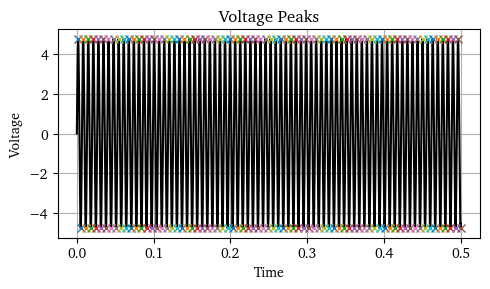

Constant = 0.13 Nm/A


In [7]:
test_t = np.linspace(0, 0.5, 5000) #example time array
test_signal = (9.5/2) * np.sin(151.6 * 2* np.pi * test_t) #example signal
#nice_plot_please(test_t,test_signal,"Test Signal","Time","Voltage")
example_data = {}
example_data["Test"] = {'times': test_t, 'voltages': test_signal}
[test_period,test_voltage] = waveform_data_info("Test",example_data,window_start=0,window_size=0,voltage_threshold=.5,plot=True)
test_constant = torque_finder(test_period,test_voltage,21,True)
print(f"Constant = {round(test_constant, 2)} Nm/A")

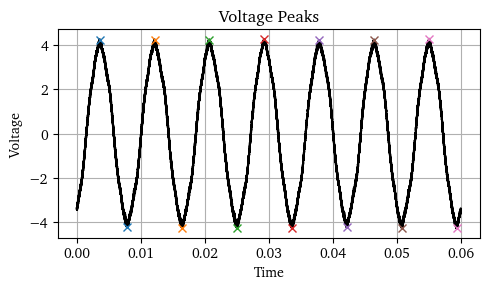

In [8]:
example = "CHAN3_1000rpm1"
(example_half_period,example_pk2pk)=waveform_data_info(example,voltage_threshold=.5,plot=True,dist=200,prom=.5,distance_factor=2)


In [9]:
all_back_torque_constant = []
experiment_start_points=[0]
for experiment in centered_data:
    i=0
    #print(f"Experiment: {experiment}")
    (period, voltage) = waveform_data_info(experiment, data=centered_data, voltage_threshold=0.5, plot=False, dist=200, prom=0.5, distance_factor=2)
    torque_constant = torque_finder(period,voltage,7,True)
    all_back_torque_constant.extend([torque_constant])
    experiment_start_points.append(all_back_torque_constant[i]+len(all_back_torque_constant))
    i+=1

Mean: 0.04954087607322352, Standard Deviation: 0.0006867196153078932


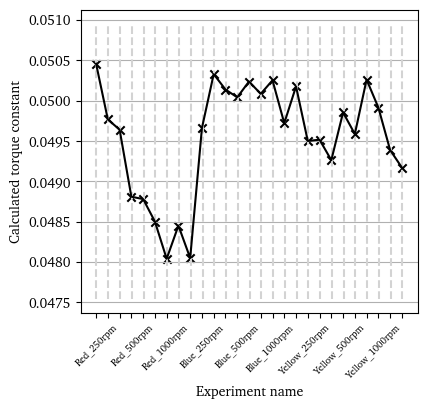

In [39]:
padding = 0.0005
for i, label in enumerate(centered_data.keys()):
    plt.vlines(experiment_start_points[i], min(all_back_torque_constant)-padding, max(all_back_torque_constant)+padding, color='lightgrey', linestyle='--')
plt.plot(all_back_torque_constant, color='black')
plt.scatter(range(len(all_back_torque_constant)), all_back_torque_constant, color='black', marker='x')
print(f"Mean: {np.mean(all_back_torque_constant)}, Standard Deviation: {np.std(all_back_torque_constant)}")
custom_labels = [f"{chan}_{rpm}" for chan in ["Red", "Blue", "Yellow"] for rpm in ["250rpm", "500rpm", "1000rpm"] for _ in range(3)]
custom_labels = [label if (i+1) % 3 == 0 else '' for i, label in enumerate(custom_labels)]
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, fontsize=7, ha='right')
plt.xlabel("Experiment name")
plt.ylabel("Calculated torque constant")
plt.tight_layout()
plt.grid(axis='y')
plt.gcf().set_size_inches(4, 4)
plt.show()